In [1]:
# This notebook inspects the Ca+ and DA data fro mexperiment tagged as HSFP_636970_2022-11-14-12-34-14
# These data are used only to determine parameters for the simulation that the network will be trained on
# The trained model will be simply applied to this data.
# To use this for reconstruction, we'll have to be very careful with the notch filters.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

import h5py
import pandas as pd
from sourcesep.utils.config import load_config

In [2]:
paths = load_config(dataset_key='all')
f = h5py.File(paths['root'] / 'HSFP_636970_2022-11-14-12-34-14_data_preprocessed.hdf5', 'r')
print(f.keys())

xj = {}
xj[0] = f['Channel3'][:] #405
xj[1] = f['Channel2'][:] #473
xj[2] = f['Channel1'][:] #560

t = f['Time'][:]
l = f['Wavelength'][:]

print(f'\nsampling frequency: {1/(np.max(t) / t.size):0.2f} Hz')
print(f'length of recording: {np.max(t)-np.min(t):0.2f} seconds')
print(f'\neach channel has dimensions of {xj[0].shape}')
print(f'min. wavelength: {np.min(l):0.2f} nm')
print(f'max. wavelength: {np.max(l):0.2f} nm')

# time stamps are common across channels

Paths are for dataset tagged: all
<KeysViewHDF5 ['Channel1', 'Channel2', 'Channel3', 'Time', 'Wavelength']>

sampling frequency: 40.00 Hz
length of recording: 441.64 seconds

each channel has dimensions of (17666, 300)
min. wavelength: 400.00 nm
max. wavelength: 699.00 nm


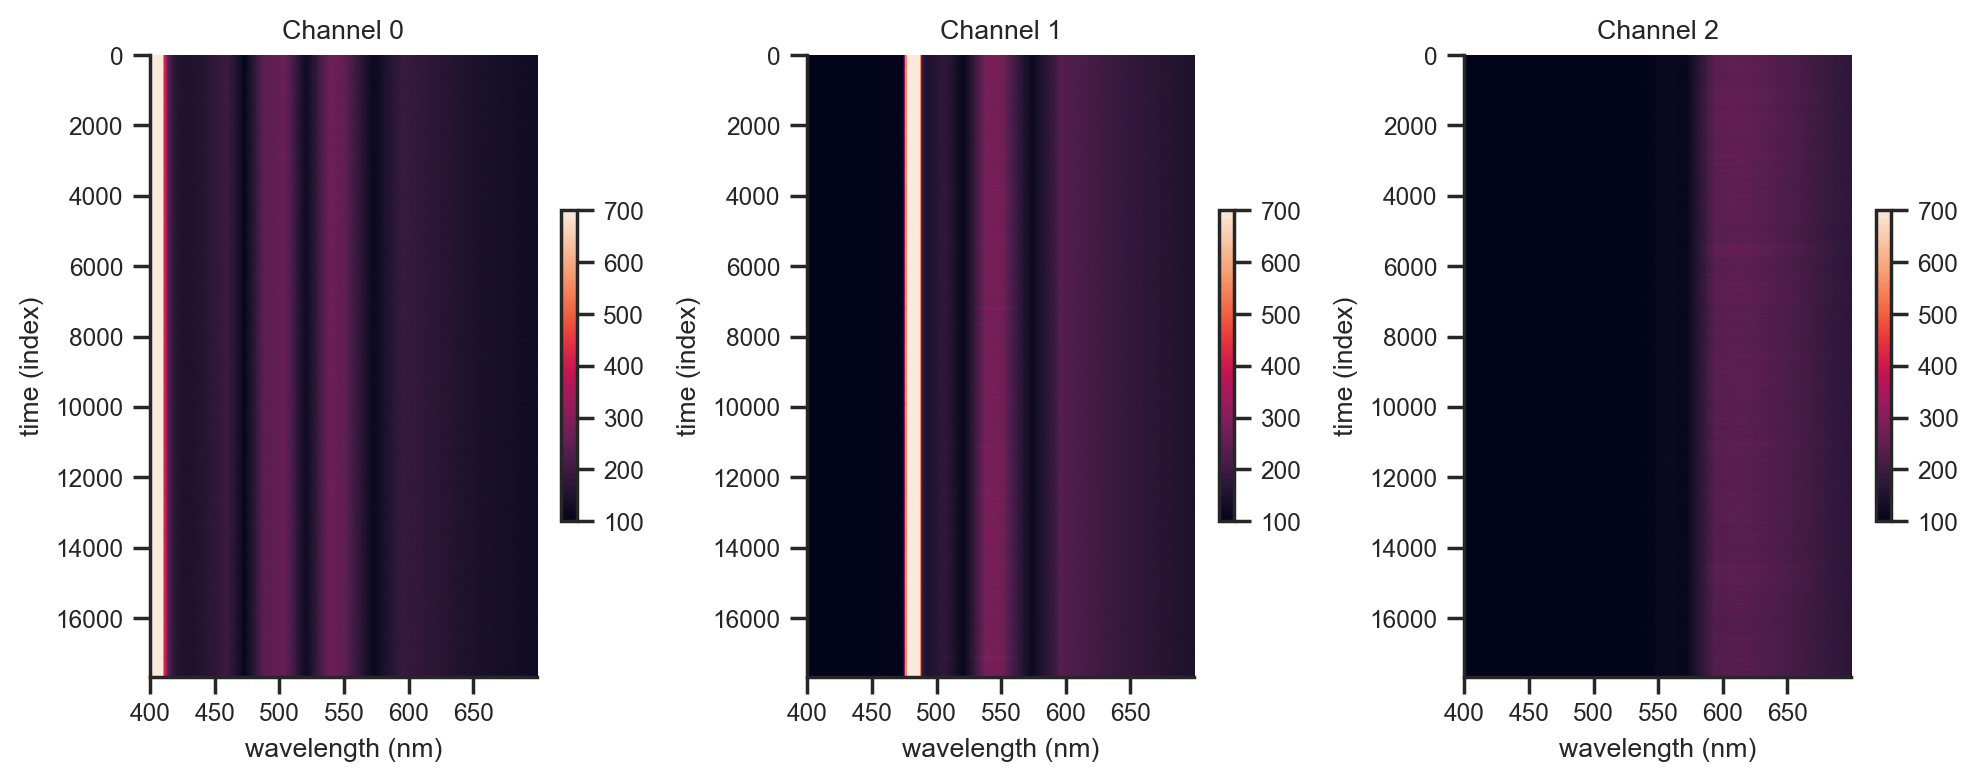

In [3]:
# show raw intensities

f, ax = plt.subplots(1, 3, figsize=(10, 4))
for i in range(3):
    f.colorbar(ax[i].imshow(xj[i], interpolation='nearest', aspect='auto', vmin=100, vmax=700), ax=ax[i], shrink=0.5)
    ax[i].grid(visible=False)
    ax[i].set(xlabel='wavelength (nm)', ylabel='time (index)', title=f'Channel {i}')
    ax[i].set_xticks(np.arange(0, 300, 50), labels=l[np.arange(0, 300, 50)])

plt.tight_layout()

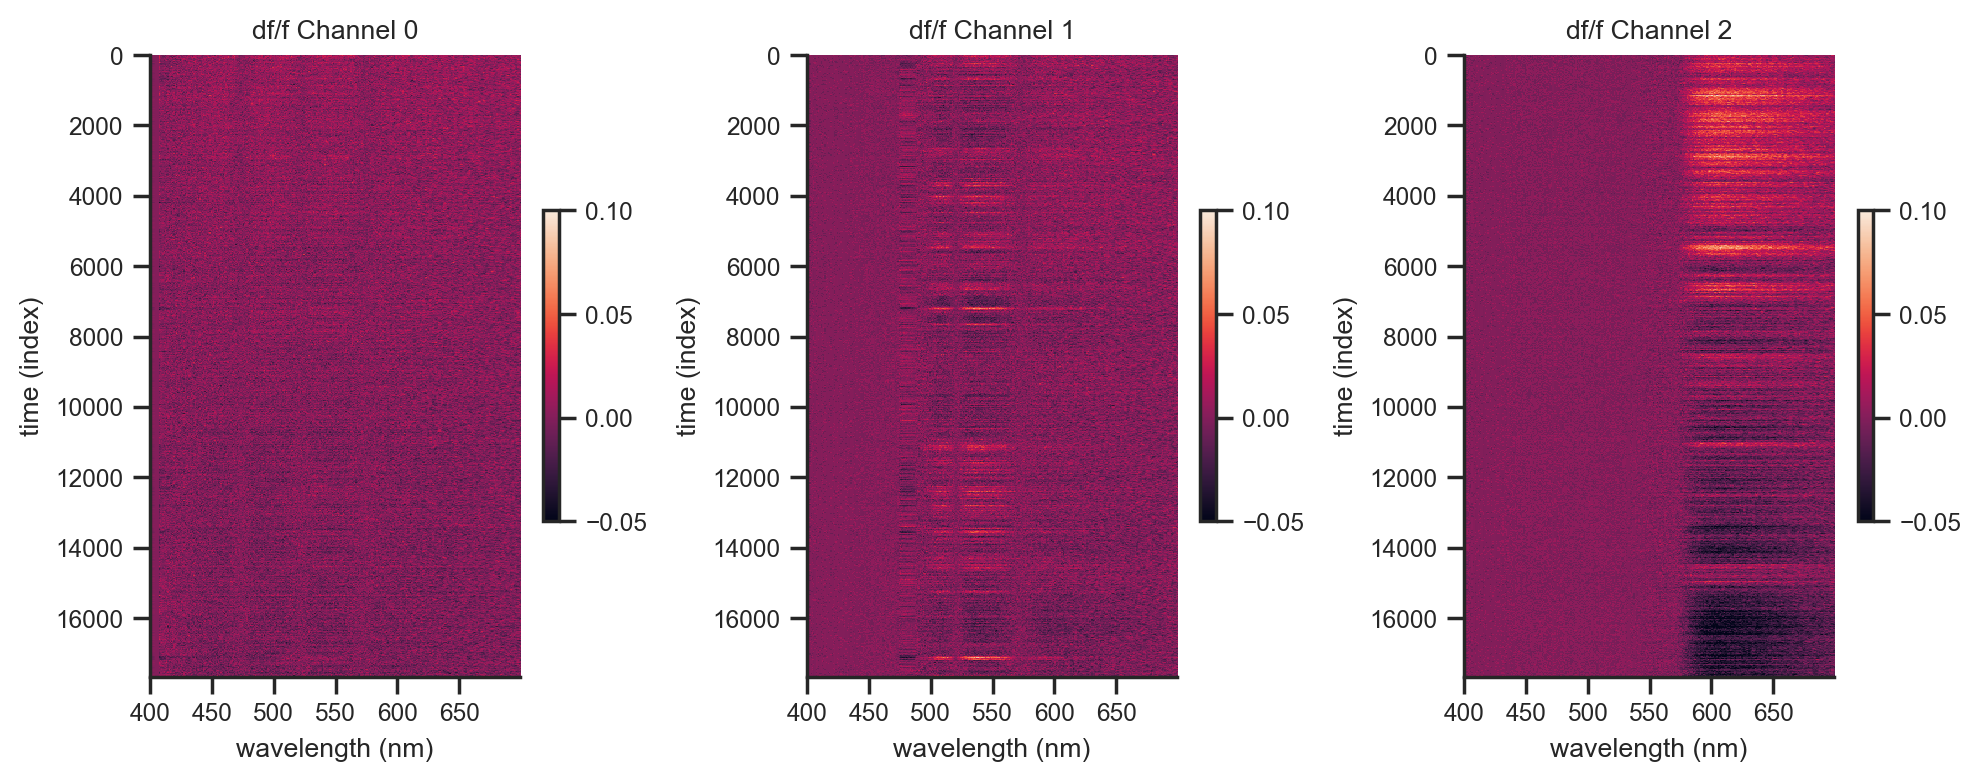

In [4]:
# show df/f
Xj = {}
for i in range(3):
    mean_xj = np.mean(xj[i], axis=0, keepdims=True)
    Xj[i] = (xj[i] - mean_xj)/mean_xj

f, ax = plt.subplots(1, 3, figsize=(10, 4))
for i in range(3):
    f.colorbar(ax[i].imshow(Xj[i],
                            interpolation='nearest',
                            aspect='auto',
                            vmin=-0.05, vmax=0.1),
               ax=ax[i], shrink=0.5)
    ax[i].grid(False)
    ax[i].set(xlabel='wavelength (nm)', ylabel='time (index)', title=f'df/f Channel {i}')
    ax[i].set_xticks(np.arange(0, 300, 50), labels=l[np.arange(0, 300, 50)])

plt.tight_layout()
plt.show()

DA signal is excited by the 560 laser, and peak emission is at ~610 nm 
       Here: channel 2 seems to be the 560 nm laser


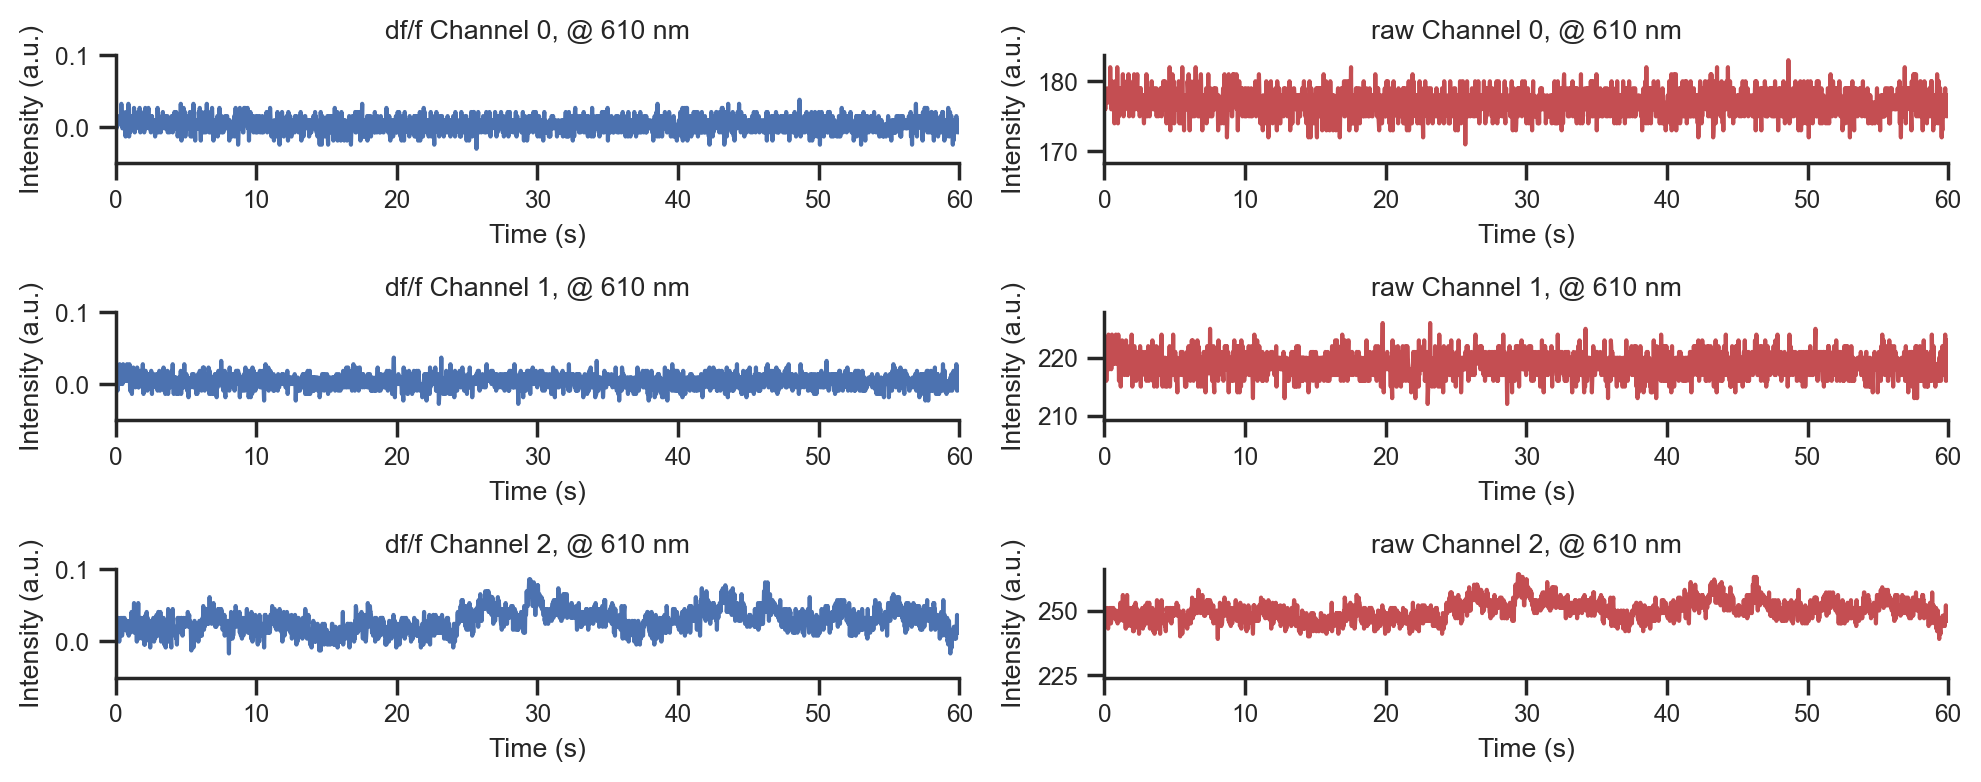


Ca signal is excited by the 473 laser, and emitted at 530 nm 
       Here: channel 1 seems to be the 473 nm laser


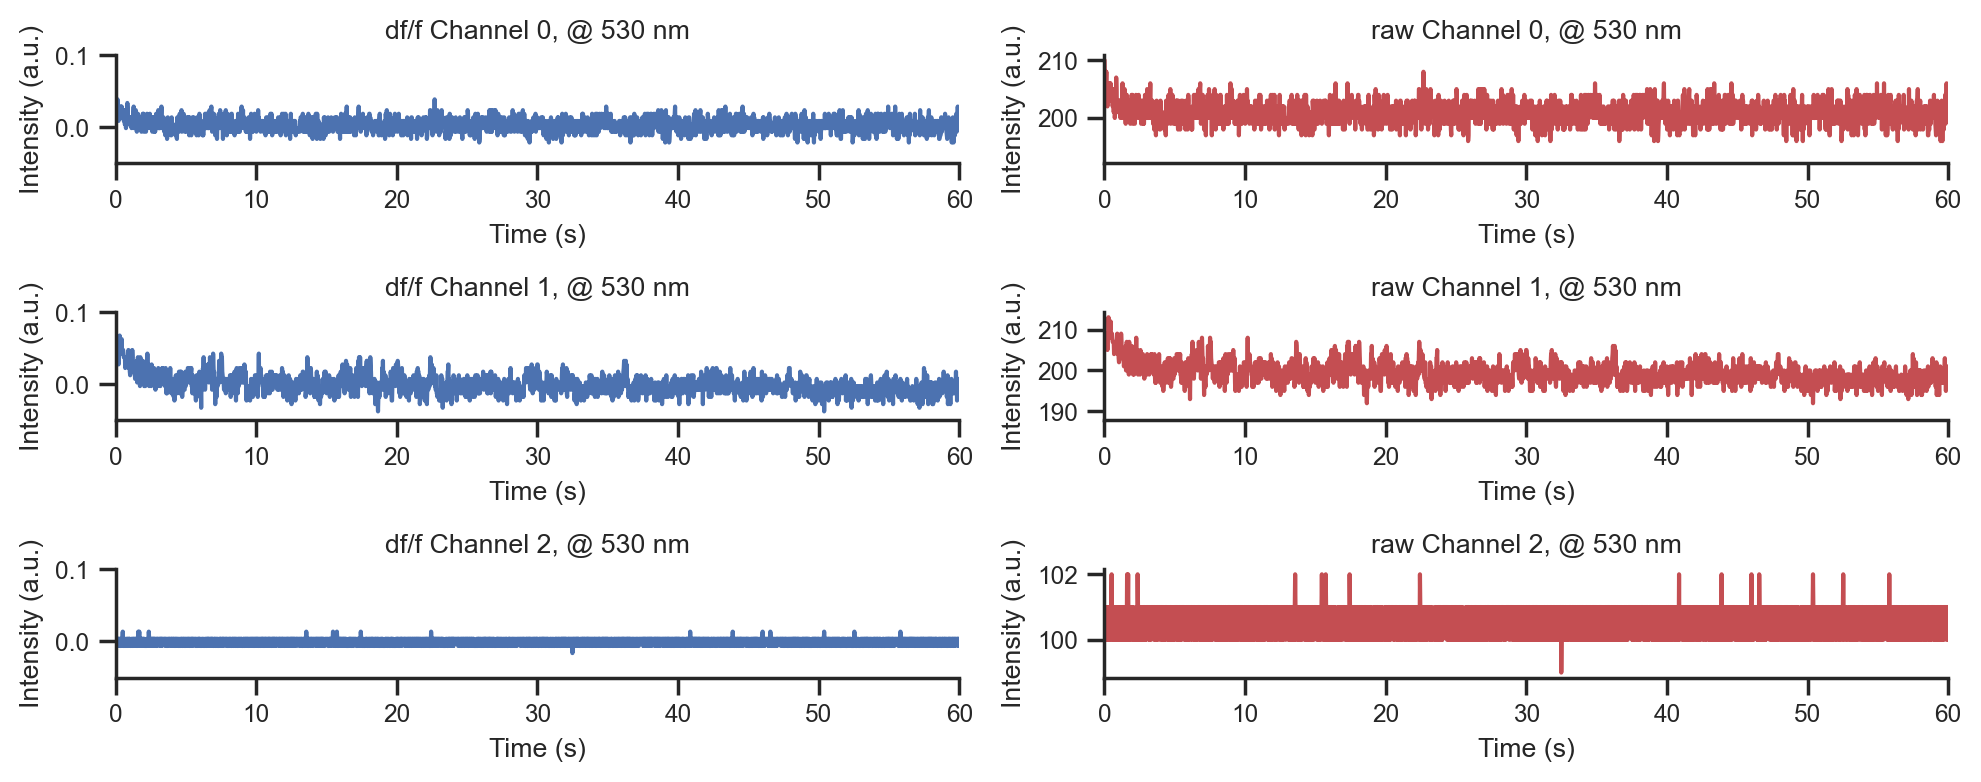


405 laser does not excite either sensor 
       Based on previous two assignments this is channel 3


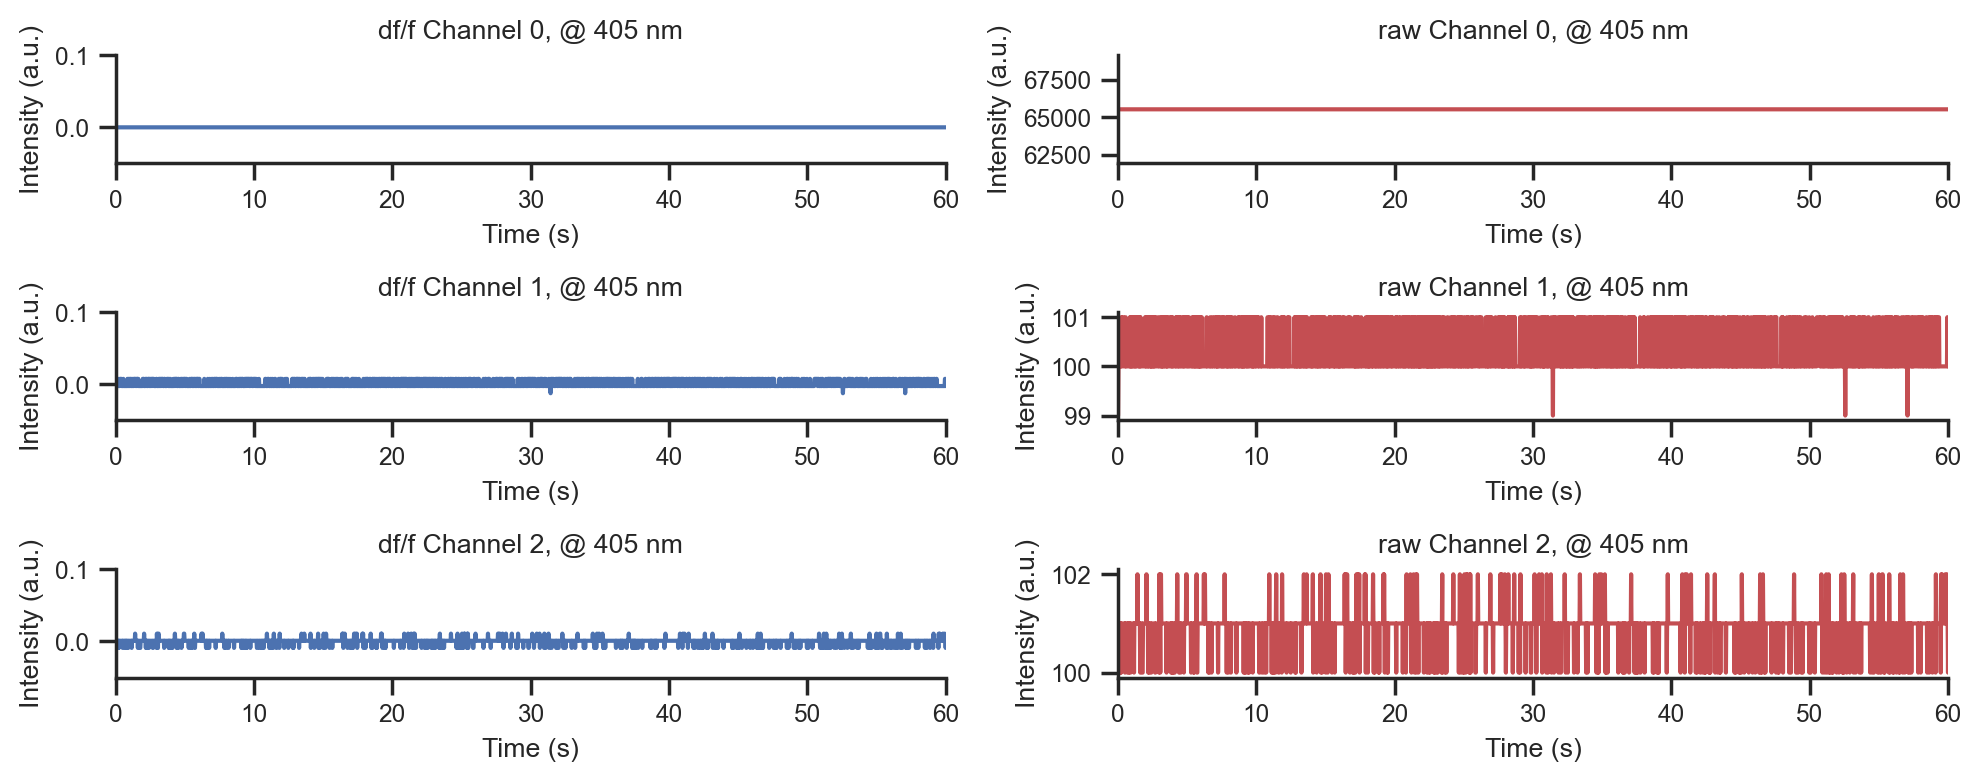

In [5]:
# Channels correspond to different lasers
# The lasers used are:
# channel 2 - em_wavelength_nm = 561
# channel 1 - em_wavelength_nm = 473
# channel 0 - em_wavelength_nm = 405

def df_over_f(x):
    mean_x = np.mean(x)
    return (x - mean_x)/mean_x

def plot_channels(l, t, xj, em_freq, xlim=(0,60)):
    f, ax = plt.subplots(3,2,figsize=(10,4))
    k=0
    for i in range(3):
        ax[i,k].plot(t.ravel(),df_over_f(xj[i][:,l==em_freq].ravel()))
        ax[i,k].set(xlim=xlim, 
                  ylim=(-0.05, 0.1), 
                  xlabel='Time (s)', 
                  ylabel='Intensity (a.u.)', 
                  title=f'df/f Channel {i}, @ {em_freq} nm')
    k=1
    for i in range(3):
        ax[i,k].plot(t.ravel(),xj[i][:,l==em_freq].ravel(), c='r')
        ax[i,k].set(xlim=xlim, 
                  xlabel='Time (s)', 
                  ylabel='Intensity (a.u.)', 
                  title=f'raw Channel {i}, @ {em_freq} nm')
        
    plt.tight_layout()
    plt.show()
    return

print('DA signal is excited by the 560 laser, and peak emission is at ~610 nm \n \
      Here: channel 2 seems to be the 560 nm laser')
plot_channels(l, t, xj, em_freq=610, xlim=(0,60))

print('\nCa signal is excited by the 473 laser, and emitted at 530 nm \n \
      Here: channel 1 seems to be the 473 nm laser')
plot_channels(l, t, xj, em_freq=530, xlim=(0,60))

print('\n405 laser does not excite either sensor \n \
      Based on previous two assignments this is channel 3')
plot_channels(l, t, xj, em_freq=405, xlim=(0,60))